###### IMPORT STATEMENTS

In [1465]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1466]:
from scipy.stats import norm, probplot

In [1467]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, Perceptron
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

#import xgboost as xgb
#import lightgbm as lgb

In [1468]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [1469]:
# #standard plotly imports
# from chart_studio import plotly
# # import plotly.plotly as py
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot

In [1470]:
sns.set_style('whitegrid', {'axes,grid' : False})

In [1471]:
pd.options.display.max_columns

30

In [1472]:
pd.set_option('display.max.columns', 30)

# LOAD DATASET

In [1473]:
data = pd.read_csv('/home/hadesanirban/Downloads/Insurance_Marketing-Customer-Value-Analysis (1).csv')

In [1474]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [1475]:
print('No of data points :: ', len(data))

No of data points ::  9134


In [1476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [1477]:
data.isnull().values.any()#checking for null values

False

In [1478]:
len(data.columns)

24

In [1479]:
data['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [1480]:
data['State'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [1481]:
data['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [1482]:
data['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [1483]:
data['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [1484]:
data['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [1485]:
data['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [1486]:
data['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [1487]:
data['Renew Offer Type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [1488]:
data['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [1489]:
data['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [1490]:
data['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [1491]:
data['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

### INFERENCE
- 9134 rows, 24 rows
- Predict costumer-lifetime-value
- No missing values

### COLS
- State :: Washington, Arizona, Nevada, California, Oregon
- Response :: Yes, No  [??]
- Coverage :: Basic, Extended, Premium
- Education :: Bachelor, College, Master, High School or Below, Doctor
- Employment Status :: 
- Gender :: F, M
- Location Code :: Suburban, Rural, Urban
- Marital Status :: Married, Single, Divorced
- Policy Type :: Corporate Auto, Personal Auto, Special Auto
- Policy :: 
            Personal L1, Corporate L1, Special L1
            Personal L2, Corporate L2, Special L2
            Personal L3, Corporate L3, Special L3  
            
- Renew Offer Type :: Offer1, Offer3, Offer2, Offer4
- Sales Channel :: Agent, Call Center, Web, Branch
- Vehicle Class :: Two-Door Car, Four-Door Car, SUV, Luxury SUV, Sports Car, Luxury Car
- Vehical Size :: Medsize, Small, Large

### Questions
- Difference between policy_type and policy

### Hypothesis
- The state/location_code in which CLV is higher implie more accident prone(month_since_last_claim) or premium(is_col)/Coverage(is_col) is lower
- See the relation between Marital Status and Education
- See the relation between Employment Status and Education

In [1492]:
target_name = "Customer Lifetime Value"

### Get all the categorical cols and non-categorical cols

In [1493]:
all_categorical_cols = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
                    'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 
                    'Sales Channel', 'Vehicle Class', 'Vehicle Size']

all_continous_cols = list(set(data.columns) - set(all_categorical_cols) - set(['Customer', 'Customer Lifetime Value']))
assert(len(all_categorical_cols) + len(all_continous_cols) + 2 == len(data.columns))

### Data is right-skewed

Skewness: 3.032280
Kurtosis: 13.823533

 mu = 8004.94 and sigma = 6870.59



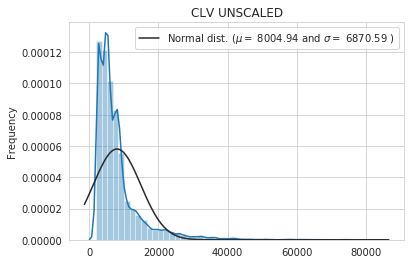

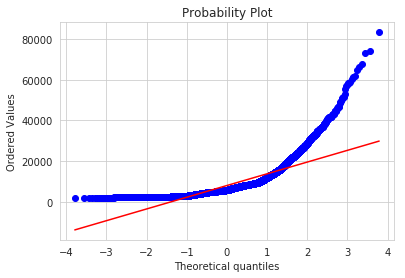

In [1494]:
sns.distplot(data[target_name].values, fit = norm)

print("Skewness: %f" % data[target_name].skew())
print("Kurtosis: %f" % data[target_name].kurt())

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data[target_name])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best');
plt.ylabel('Frequency');
plt.title('CLV UNSCALED');

#Get also the QQ-plot
fig = plt.figure()
res = probplot(data[target_name], plot = plt)
plt.show()

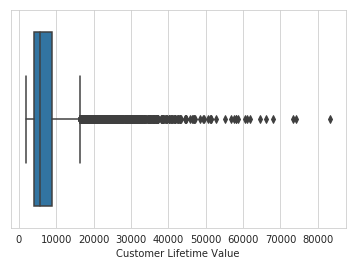

In [1495]:
sns.boxplot(data[target_name])

In [1496]:
limit = 18000
data['CLV_range'] = data.apply(lambda x : 1 if x[target_name]>limit else 0, axis=1)#added a column named clv_range indicating the outliers

In [1497]:
assert(len(data[data.loc[:, 'CLV_range'] == 1]) == len(data[data[target_name] > limit]))

In [1498]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [1499]:
data["Effective To Date"]=pd.to_datetime(data["Effective To Date"])

# some functions

In [1500]:
from sklearn.preprocessing import MinMaxScaler

In [1501]:
def log_transform(df,col):
        df[col+"_"+"log"]=df[col].apply(lambda x : np.log1p(x))
        
def Scaling(df,col):
    scaler=MinMaxScaler()
    df[col+"_"+"scaled"] = scaler.fit_transform(df[col].values.reshape(-1, 1))

def date(df,col):
    df[col]=pd.to_datetime(df[col])
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year
    

In [1502]:
log_transform(data,"Customer Lifetime Value")
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,7.924622
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,8.850881


In [1503]:
target_name_scaled="Customer Lifetime Value_log"

Skewness: 0.576172
Kurtosis: 0.083031

 mu = 8.75 and sigma = 0.65



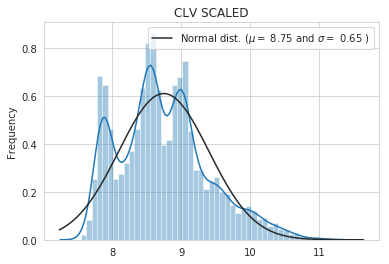

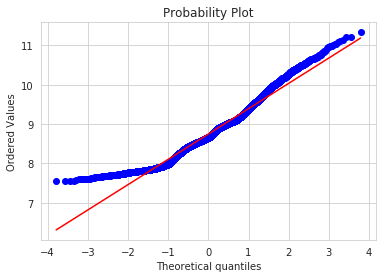

In [1504]:
sns.distplot(data[target_name_scaled].values, fit = norm)

print("Skewness: %f" % data[target_name_scaled].skew())
print("Kurtosis: %f" % data[target_name_scaled].kurt())

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data[target_name_scaled])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('CLV SCALED');

#Get also the QQ-plot
fig = plt.figure()
res = probplot(data[target_name_scaled], plot = plt)
plt.show()

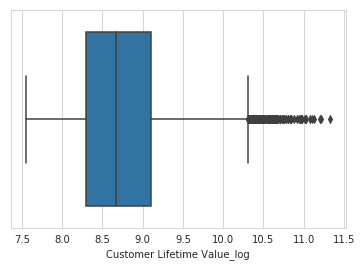

In [1505]:
sns.boxplot(data[target_name_scaled])

### Seeing the distribution of individual features of whole data

In [1506]:
def make_categorical_plot(data, col, rotate_label = 0, title = None):
    fig = plt.figure(figsize = (6, 6))
    total = data.shape[0]
    ax = sns.countplot(x = col, data = data, order = data[col].value_counts().sort_values(ascending = False).index)
    ax.set_title(title)
    ax.set_xticklabels(data[col].value_counts().sort_values(ascending = False).index, rotation = rotate_label)
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height() * 100 / total), (p.get_x() + 0.3, p.get_height() + 15))

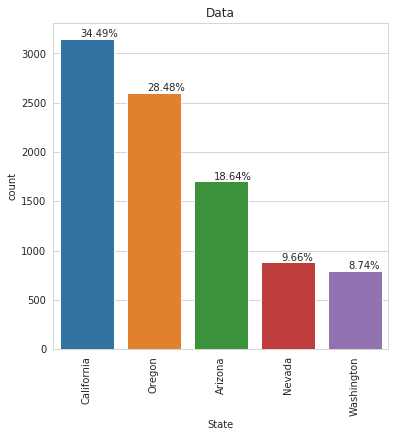

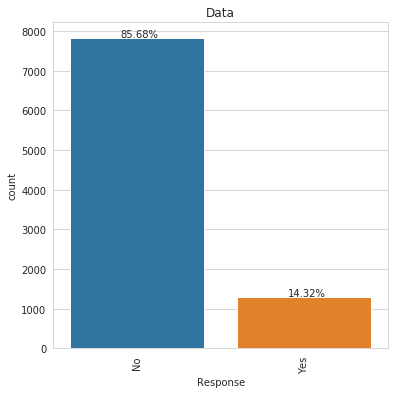

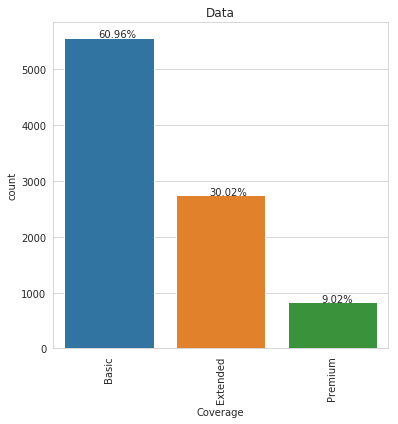

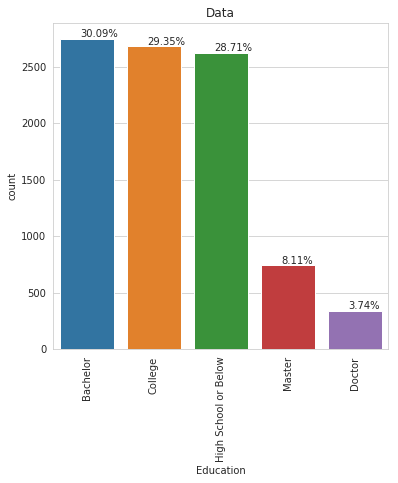

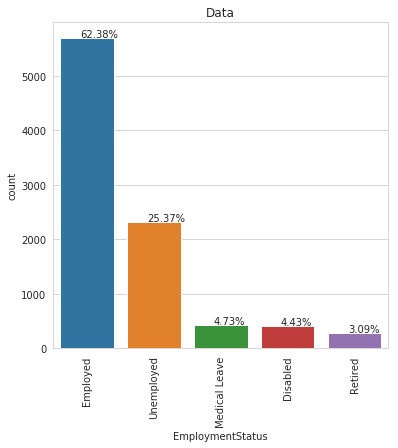

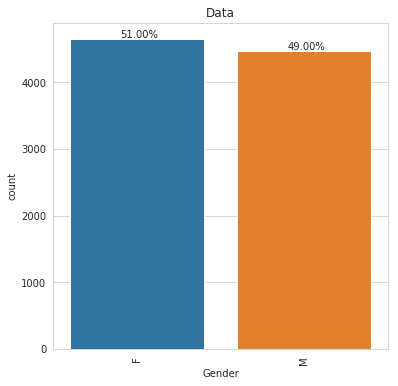

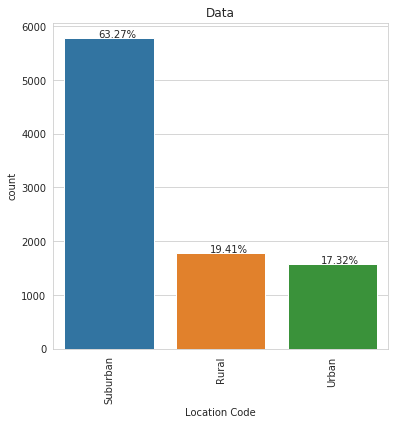

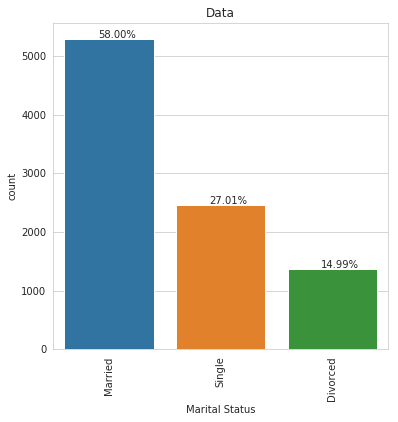

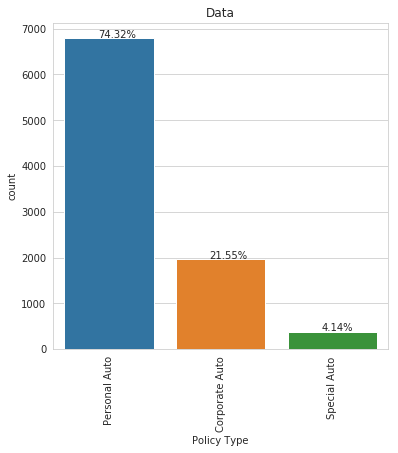

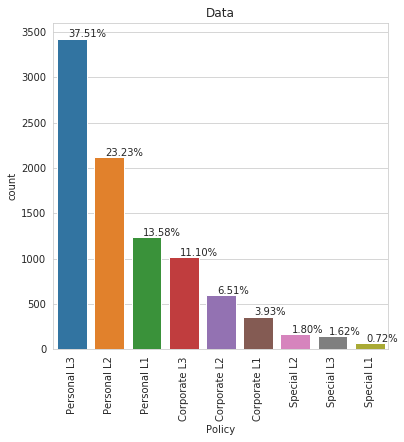

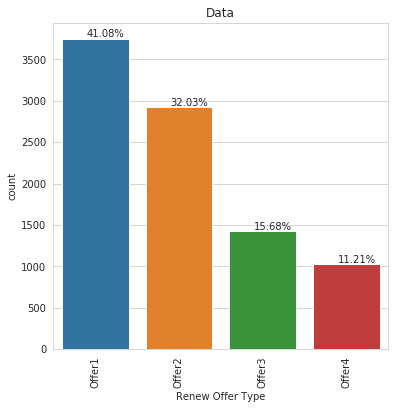

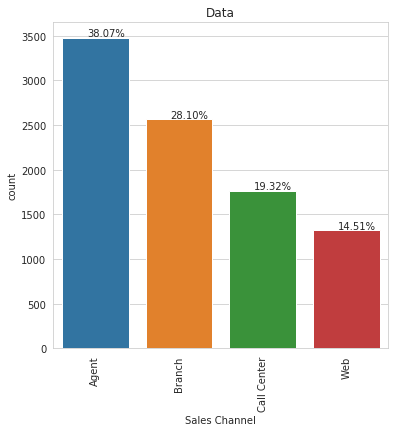

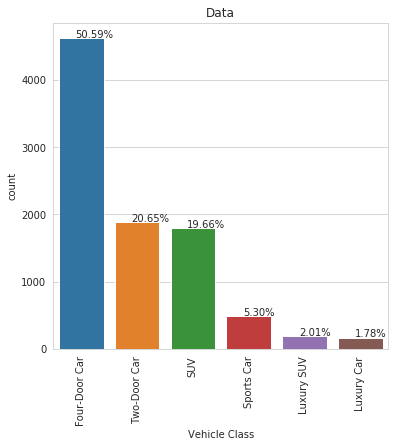

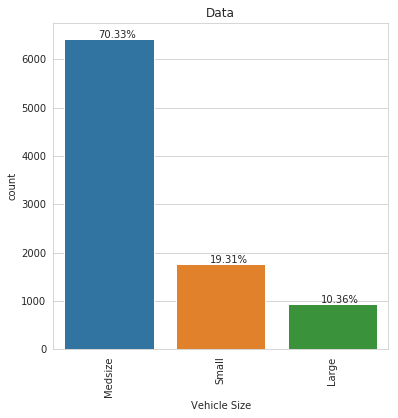

In [1507]:
for categorical_col in all_categorical_cols:
    make_categorical_plot(data, categorical_col, rotate_label=90, title='Data')

### INFERENCE FROM UNIVARIATE ANALYSIS
- Most(85%) of the responses are No
- Most of the coverage is basic (basic > extended > premium)
- Most(62%) people are employed
- Gender ratio in data is 1:1
- Location preference is sub-urban, can imply more accident prone due to road conditions
- Married(58), Unmarried(27), Divorced(14) => see relationship with vehicle size
- Married(58) and vehicle class=> four-door (50.59), so see the relationship between both
- Most(74%) Policy type is personal
- Policy :: L3>L2>L1 (preference)

### Split the data and see both train data and test data distribution is similar

In [1508]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=21, shuffle=True, stratify=data['CLV_range'])
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [1509]:
train.shape

(6119, 26)

In [1510]:
test.shape

(3015, 26)

In [1511]:
print(target_name)
print(target_name_scaled)

Customer Lifetime Value
Customer Lifetime Value_log


In [1512]:
print('Max CLV for train data is', max(train[target_name]))
print('Max CLV for test data is', max(test[target_name]))

Max CLV for train data is 83325.38119
Max CLV for test data is 67907.2705


In [1513]:
limit = 18000
print('No of train data pts with CLV >', limit, 'is', len(train[train[target_name] > limit]))
print('No of test data pts with CLV >', limit, 'is', len(test[test[target_name] > limit]))

No of train data pts with CLV > 18000 is 462
No of test data pts with CLV > 18000 is 227


#### TRAIN

Skewness: 0.597132
Kurtosis: 0.129987

 mu = 8.75 and sigma = 0.65



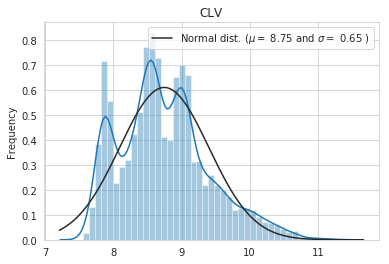

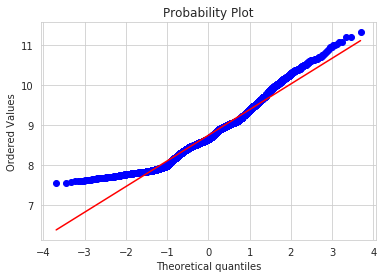

In [1514]:
sns.distplot(train[target_name_scaled].values, fit = norm)

print("Skewness: %f" % train[target_name_scaled].skew())
print("Kurtosis: %f" % train[target_name_scaled].kurt())

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train[target_name_scaled])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('CLV');

#Get also the QQ-plot
fig = plt.figure()
res = probplot(train[target_name_scaled], plot = plt)
plt.show()

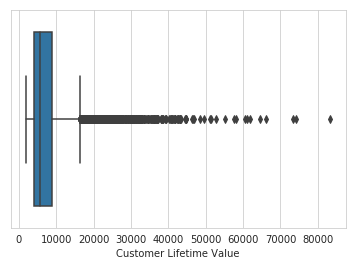

In [1515]:
sns.boxplot(train[target_name])

#### TEST

Skewness: 0.533359
Kurtosis: -0.011058

 mu = 8.75 and sigma = 0.65



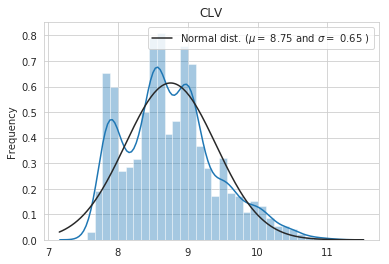

In [1516]:
sns.distplot(test[target_name_scaled].values, fit = norm)

print("Skewness: %f" % test[target_name_scaled].skew())
print("Kurtosis: %f" % test[target_name_scaled].kurt())

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(test[target_name_scaled])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('CLV');

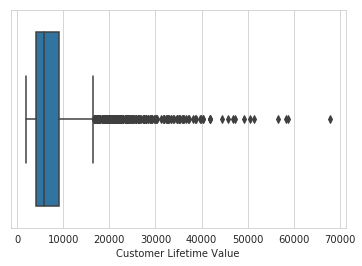

In [1517]:
sns.boxplot(test[target_name])

### Changes done
- Added CLV_log => log1p transformation on CLV

In [1518]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,7.924622
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,8.850881
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,9.464085
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,8.942051
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,7.942608


### Check the distribution of train and test data for individual features => DONE (CHALEGA)

In [1519]:
# ##Not required to run it again, checked
# for categorical_col in all_categorical_cols:
#     make_categorical_plot(train, categorical_col, rotate_label=90, title='Train')
#     make_categorical_plot(test, categorical_col, rotate_label=90, title='Test')

### Plot continous variables to analyze them

In [1520]:
def plot_categorical_alone(df, column, test_df = None, plot_train = True, plot_test = False, annotate = True, ax = None):
    if ax is None:
        fig = plt.figure(figsize = (5, 5))
    
    if plot_train:
        ax1 = sns.countplot(df[column], ax = ax)
        total = len(df)
    
    if plot_test and test_df is not None:
        ax2 = sns.countplot(test_df[column], ax = ax)
        total1 = len(test_df)
    
    if annotate:
        if plot_train:
            for p in ax1.patches:
                ax1.annotate('{} / {:d}, {:.2f}%'.format(p.get_height(), int(total), p.get_height() * 100 / total), (p.get_x() - 0.1, p.get_height() + 1))
        
        if plot_test and test_df is not None:
            for p in ax2.patches:
                ax2.annotate('{} / {:d}, {:.2f}%'.format(p.get_height(), int(total1), p.get_height() * 100 / total1), (p.get_x() - 0.1, p.get_height() + 0.5))

In [1521]:
# plot_categorical_alone(train, col, plot_train = True, test_df = test, plot_test = False)

In [1522]:
all_continous_cols

['Number of Policies',
 'Months Since Policy Inception',
 'Total Claim Amount',
 'Months Since Last Claim',
 'Effective To Date',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints']

## Analyzing numerical variables

In [1523]:
def plot_numerical_alone(df, column, test_df = None, plot_train = True, plot_test = False, vertical = False):
    fig = plt.figure(figsize = (5, 5))
    
    title = 'Train-Test' if plot_test else 'Train'
    plt.title(title)
    
    orient = 'h'
    if vertical:
        orient = 'v'
    
    if plot_train:
        sns.boxplot(df[column], orient = orient)
    
    if plot_test and test_df is not None:
        sns.boxplot(test_df[column], orient = orient)

### No person with outlier like income, means almost similar group of income(i.e. not very rich) of people is considered

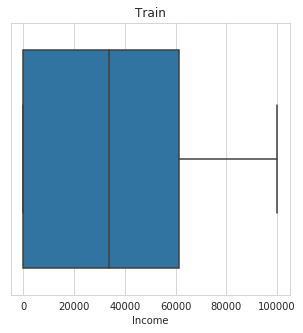

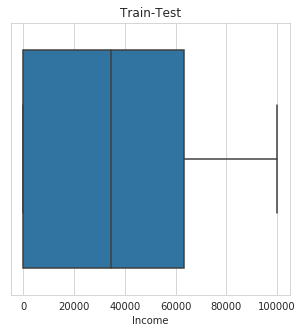

In [1524]:
plot_numerical_alone(train, 'Income', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Income', test_df = test, plot_train = False, plot_test = True)

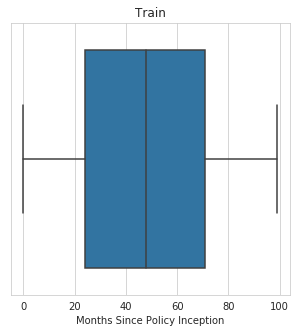

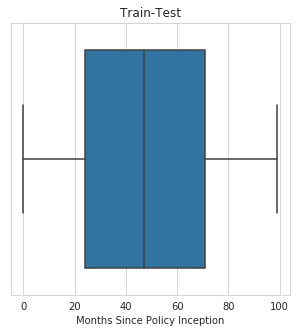

In [1525]:
plot_numerical_alone(train, 'Months Since Policy Inception', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Months Since Policy Inception', test_df = test, plot_train = False, plot_test = True)

### Some pays very high amount of monthly premium

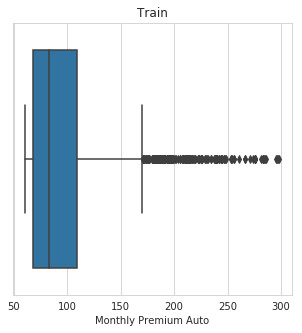

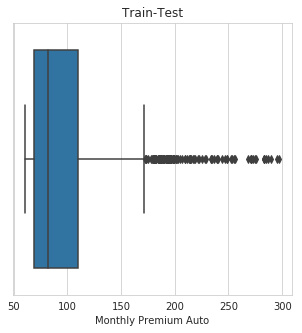

In [1526]:
plot_numerical_alone(train, 'Monthly Premium Auto', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Monthly Premium Auto', test_df = test, plot_train = False, plot_test = True)

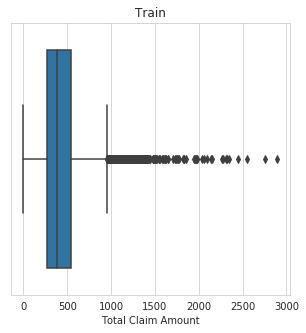

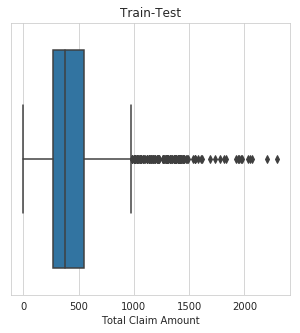

In [1527]:
plot_numerical_alone(train, 'Total Claim Amount', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Total Claim Amount', test_df = test, plot_train = False, plot_test = True)

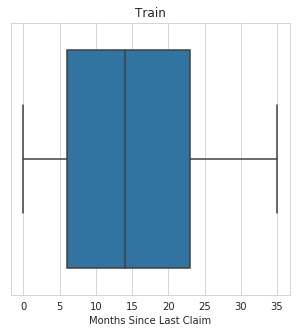

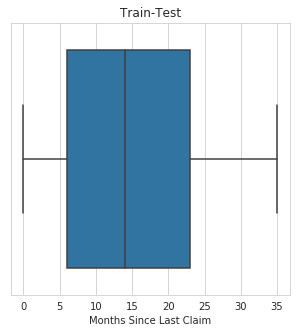

In [1528]:
plot_numerical_alone(train, 'Months Since Last Claim', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Months Since Last Claim', test_df = test, plot_train = False, plot_test = True)

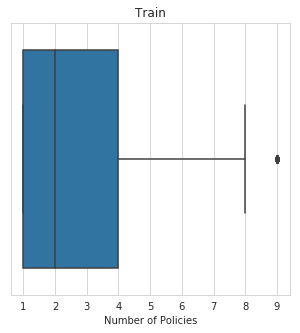

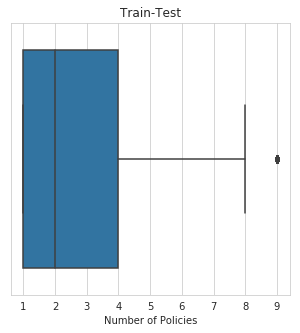

In [1529]:
plot_numerical_alone(train, 'Number of Policies', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Number of Policies', test_df = test, plot_train = False, plot_test = True)

### Most complaints will get closed

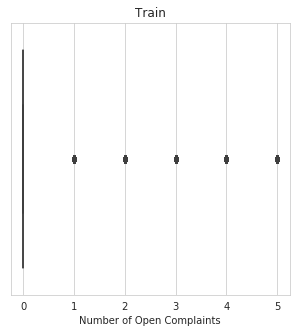

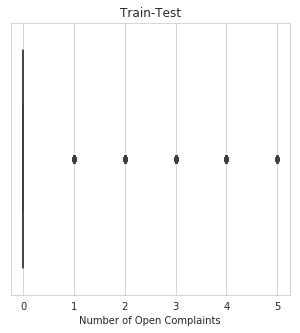

In [1530]:
plot_numerical_alone(train, 'Number of Open Complaints', test_df = test, plot_train = True, plot_test = False)
plot_numerical_alone(train, 'Number of Open Complaints', test_df = test, plot_train = False, plot_test = True)

### Some BI-VARIATE ANALYSIS

In [1531]:
def plot_x_y(df, x, plot_type, y = None, z = None, test_df = None, plot_train = True, plot_test = False, alpha = 0.5):
    fig = plt.figure(figsize = (5, 5))
    
    if plot_test and plot_train:
        alpha = 0.1
        
    if plot_type == 'con':
        sns.jointplot(x, y, data = df, kind = "reg", scatter_kws = {'alpha': alpha})
        if plot_test:
            sns.jointplot(x, y, data = test_df, kind = "reg", scatter_kws = {'alpha': alpha})
    
    elif plot_type == 'con-cat':
        if plot_train:
            ax = sns.violinplot(x = x, y = y, data = df, inner = None, color = ".8")
            #ax = sns.stripplot(x = x, y = y, data = df, jitter = True, hue = z, linewidth = 1, alpha = alpha)
        if plot_test:
            ax = sns.violinplot(x = x, y = y, data = test_df, inner = None, color = ".8")
            #ax = sns.stripplot(x = x, y = y, data = test_df, jitter = True, hue = z, linewidth = 1, alpha = alpha)
        
    elif plot_type == 'cat':
        if plot_train:
            ax = sns.countplot(x = x, y = y, hue = z, data = df)
            total = df.shape[0]
        if plot_test:
            ax = sns.countplot(x = x, y = y, hue = z, data = test_df)
            total = test_df.shape[0]
        
        for p in ax.patches:
            ax.annotate('{:.2f}%'.format(p.get_height() * 100 / total), (p.get_x() + 0.1, p.get_height() + 15))

### How CLV varies with State

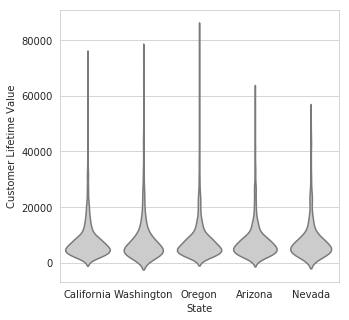

In [1532]:
plot_x_y(train, 'State', y = target_name, plot_type='con-cat')

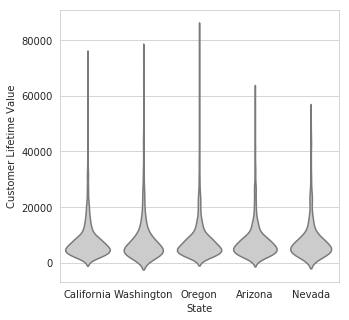

In [1533]:
plot_x_y(train, 'State', y = target_name, z = 'Location Code', plot_type='con-cat')

### How CLV varies with State and Location Code

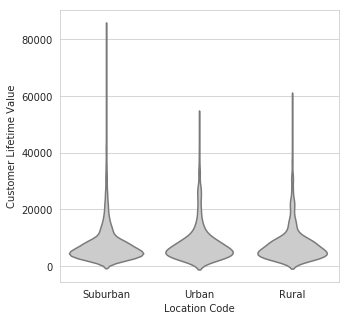

In [1534]:
plot_x_y(train, 'Location Code', y = target_name, z = 'State', plot_type='con-cat')

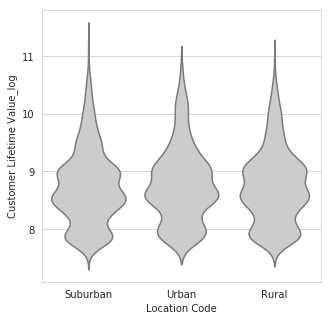

In [1535]:
plot_x_y(train, 'Location Code', y = target_name_scaled, z = 'State', plot_type='con-cat')

### Given different states, we have 
- In almost all the states, we have suburban area thrice of both urban/rural area
- Urban and Rural area have same no of people

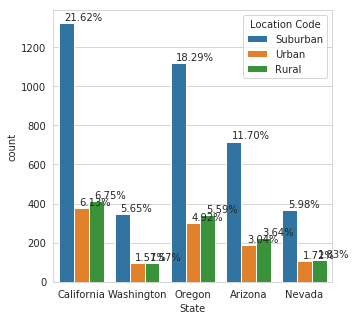

In [1536]:
plot_x_y(train, 'State', z = 'Location Code', plot_type='cat')

### CLV with Coverage

### CLV somewhat correlated to type-of-coverage
CLV :: premium > extended > basic

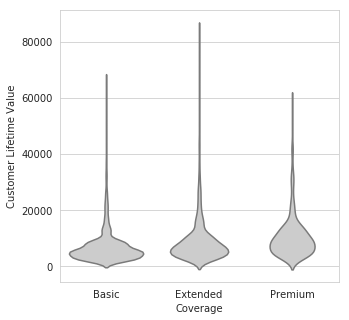

In [1537]:
plot_x_y(train, 'Coverage', y = target_name, plot_type='con-cat')

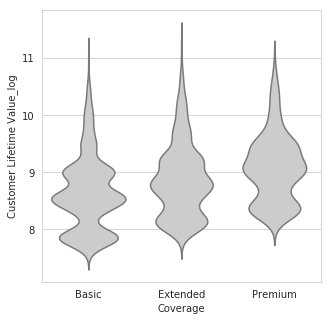

In [1538]:
plot_x_y(train, 'Coverage', y = target_name_scaled, plot_type='con-cat')

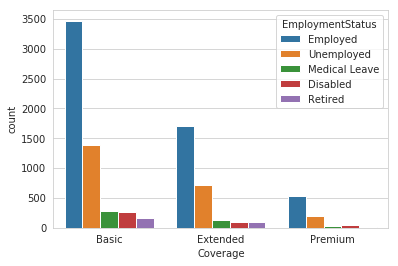

In [1539]:
sns.countplot(x=data['Coverage'], hue=data['EmploymentStatus'])

## All types of coverage are taken by all types of employed people 


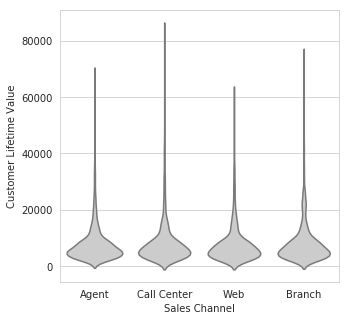

In [1540]:
plot_x_y(data,'Sales Channel',y=target_name,plot_type='con-cat')

## All types of channels have same spread of CLV


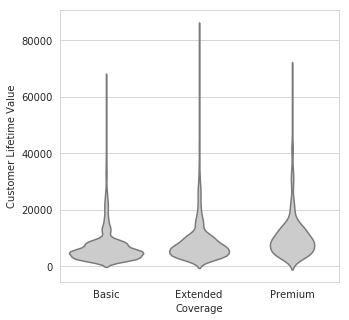

In [1541]:
plot_x_y(data,'Coverage',y=target_name,plot_type='con-cat')

## Premium has more spread over CLV than other types of coverages 

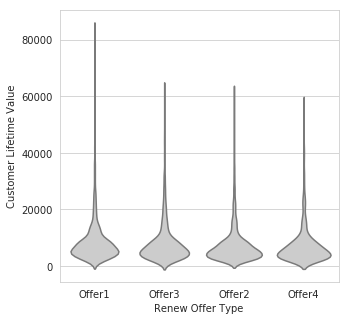

In [1542]:
plot_x_y(data,'Renew Offer Type',y=target_name,plot_type='con-cat')

## All types of offer have same spread over CLV

<Figure size 360x360 with 0 Axes>

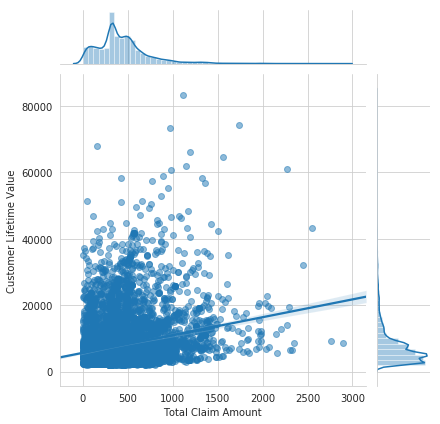

In [1543]:
plot_x_y(data,'Total Claim Amount',y=target_name,plot_type='con',)

## cannot justify a linear relationship of CLV with Total Claim Amount

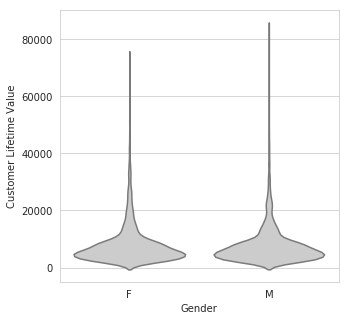

In [1544]:
plot_x_y(data,'Gender',y=target_name,plot_type='con-cat')

# all types of gender have same spread over CLV

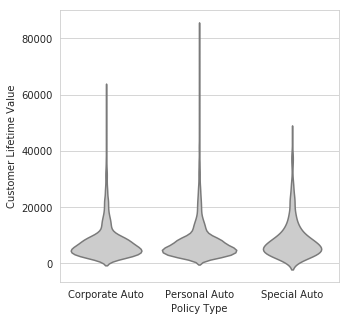

In [1545]:
plot_x_y(data,'Policy Type',y=target_name,plot_type='con-cat')

# all policy types have same spread over CLV

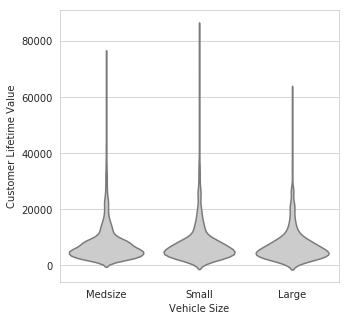

In [1546]:
plot_x_y(data,'Vehicle Size',y=target_name,plot_type='con-cat')

# all types of vehicle size have same spread over CLV

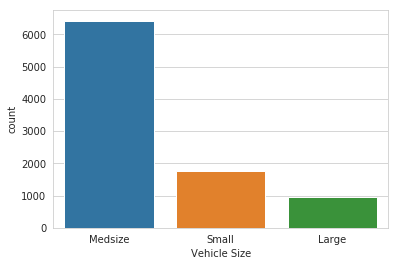

In [1547]:
sns.countplot(x="Vehicle Size",data=data)

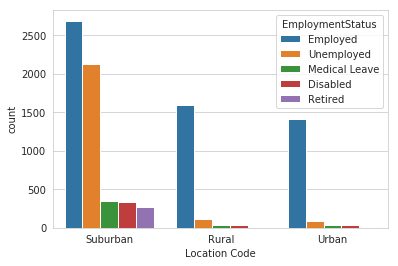

In [1548]:
sns.countplot(x=data['Location Code'],hue=data['EmploymentStatus'])

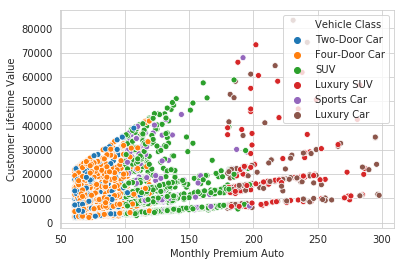

In [1549]:
sns.scatterplot(x=data['Monthly Premium Auto'],y=data['Customer Lifetime Value'],hue=data['Vehicle Class'])

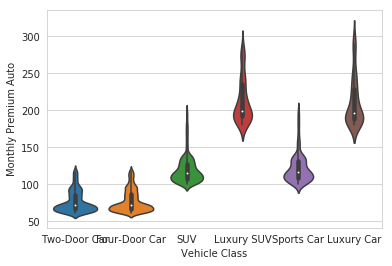

In [1550]:
sns.violinplot(x=data['Vehicle Class'],y=data['Monthly Premium Auto'])

## Some vehicle class are following some pattern on paying monthly premium amount

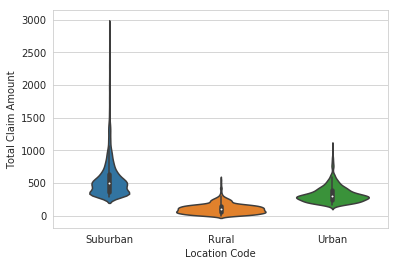

In [1551]:
sns.violinplot(x='Location Code',y='Total Claim Amount',data=data)

# customer lifetime value

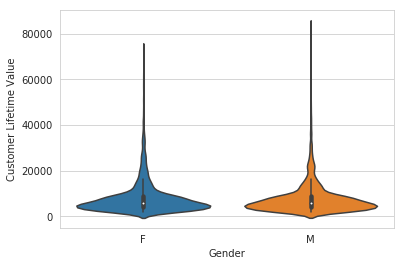

In [1552]:
sns.violinplot(x=data["Gender"],y=data["Customer Lifetime Value"])

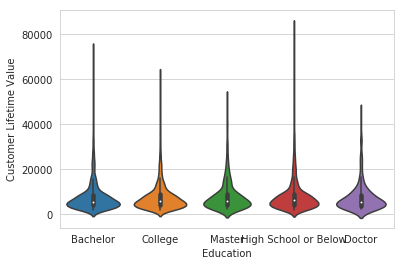

In [1553]:
sns.violinplot(x=data["Education"],y=data["Customer Lifetime Value"])

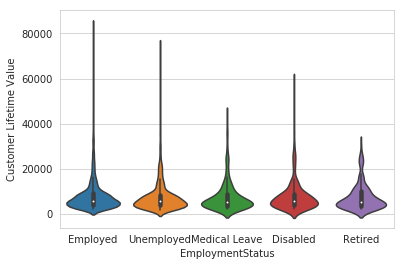

In [1554]:
sns.violinplot(x=data["EmploymentStatus"],y=data["Customer Lifetime Value"])

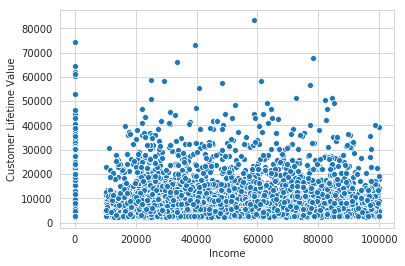

In [1555]:
sns.scatterplot(x=data["Income"],y=data["Customer Lifetime Value"])

# Those having zero income are also paying high CLV

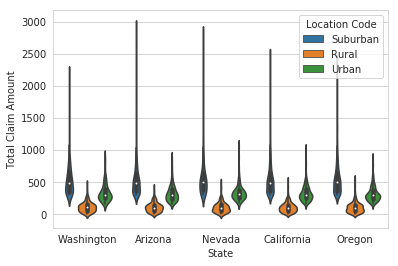

In [1556]:
sns.violinplot(x='State',y='Total Claim Amount',data=data,hue="Location Code")

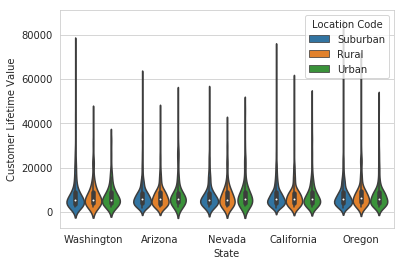

In [1557]:
sns.violinplot(x='State',y='Customer Lifetime Value',data=data,hue="Location Code")

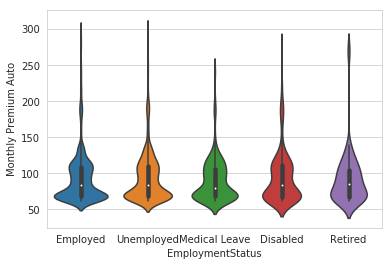

In [1558]:
sns.violinplot(x="EmploymentStatus",y="Monthly Premium Auto",data=data)

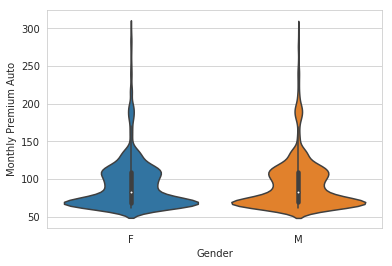

In [1559]:
sns.violinplot(x="Gender",y="Monthly Premium Auto",data=data)

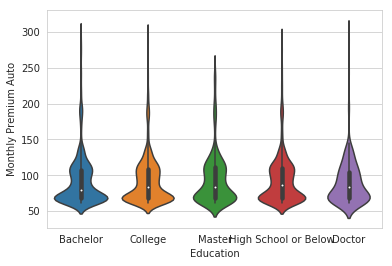

In [1560]:
sns.violinplot(x="Education",y="Monthly Premium Auto",data=data)

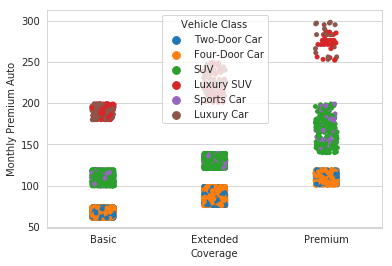

In [1561]:
sns.stripplot(x="Coverage",y="Monthly Premium Auto",data=data,hue="Vehicle Class")

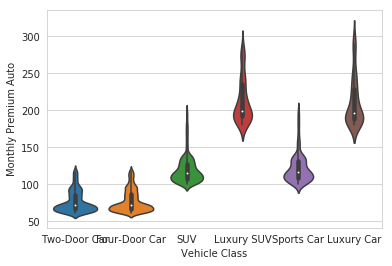

In [1562]:
sns.violinplot(x="Vehicle Class",y="Monthly Premium Auto",data=data)

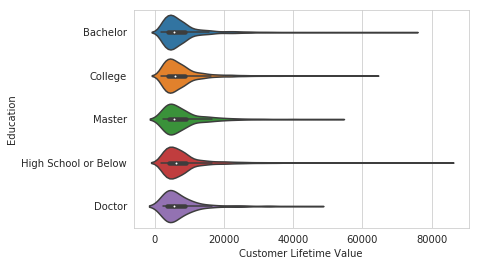

In [1563]:
sns.violinplot(y='Education',x='Customer Lifetime Value',data=data)

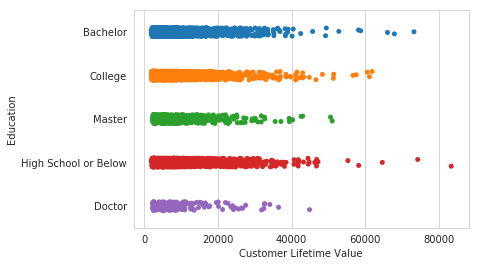

In [1564]:
sns.stripplot(y='Education',x='Customer Lifetime Value',data=data)

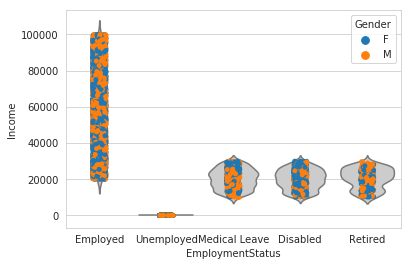

In [1565]:
sns.violinplot(x=data["EmploymentStatus"],y=data["Income"],color=".8")
sns.stripplot(x=data["EmploymentStatus"],y=data["Income"],hue=data["Gender"],jitter=True)

In [1566]:
data.shape

(9134, 26)

In [1567]:
train.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log
0,UO54511,California,4950.250892,No,Basic,High School or Below,2011-01-20,Employed,F,27400,Suburban,Married,63,14,78,1,9,Personal Auto,Personal L1,Offer3,Agent,302.400000,Four-Door Car,Medsize,0,8.507396
1,VR18539,Washington,8311.854644,No,Basic,College,2011-02-27,Employed,M,44843,Urban,Single,105,14,34,0,3,Personal Auto,Personal L2,Offer1,Branch,391.419263,SUV,Medsize,0,9.025558
2,PP39078,California,5623.611187,No,Basic,College,2011-02-19,Employed,F,31504,Suburban,Married,71,8,27,0,3,Special Auto,Special L1,Offer4,Branch,340.800000,Four-Door Car,Small,0,8.634907
3,GM48223,Oregon,5461.967787,No,Basic,Bachelor,2011-02-06,Employed,F,42650,Rural,Married,69,10,92,0,5,Personal Auto,Personal L1,Offer3,Agent,35.565605,Four-Door Car,Medsize,0,8.605747
4,UW10841,California,9976.245490,No,Basic,Bachelor,2011-02-21,Employed,M,74115,Urban,Married,63,24,24,0,2,Personal Auto,Personal L2,Offer2,Branch,275.349481,Four-Door Car,Medsize,0,9.208062


# Grouping according to the trends found from graph

In [1568]:
dic={"Basic":1,"Extended":2,"Premium":3}
data["Coverage"]=data["Coverage"].apply(lambda x : dic[x])

In [1569]:
dic_1={"Two-Door Car":1,"Four-Door Car":1,"SUV":2,"Sports Car":2,"Luxury SUV":3,"Luxury Car":3}
data["Vehicle Class"]=data["Vehicle Class"].apply(lambda x : dic_1[x])

In [1570]:
dic_2={"Unemployed":0,"Employed":1,"Medical Leave":2,"Disabled":2,"Retired":2}
data["EmploymentStatus"]=data["EmploymentStatus"].apply(lambda x : dic_2[x])

In [1571]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log
0,BU79786,Washington,2763.519279,No,1,Bachelor,2011-02-24,1,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,1,Medsize,0,7.924622
1,QZ44356,Arizona,6979.535903,No,2,Bachelor,2011-01-31,0,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,1,Medsize,0,8.850881
2,AI49188,Nevada,12887.431650,No,3,Bachelor,2011-02-19,1,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,1,Medsize,0,9.464085
3,WW63253,California,7645.861827,No,1,Bachelor,2011-01-20,0,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,2,Medsize,0,8.942051
4,HB64268,Washington,2813.692575,No,1,Bachelor,2011-02-03,1,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,1,Medsize,0,7.942608


In [1572]:
drop_list=["Customer","State","Effective To Date"]
data=data.drop(drop_list,axis=1)

In [1573]:
label_encode_list=["Response","Education","Gender","Location Code","Marital Status","Policy Type","Policy",
                  "Renew Offer Type","Sales Channel","Vehicle Size"]
for i in label_encode_list:
    data[i]=LabelEncoder().fit_transform(data[i].values)

In [1574]:
train, test = train_test_split(data, test_size=0.33, random_state=21, shuffle=True, stratify=data['CLV_range'])
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [1575]:
test.shape

(3015, 23)

In [1576]:
train.shape

(6119, 23)

# Function for augmenting data and classifiers

In [1577]:
def augment_df(df,lis):
    augment_df=df.drop(lis,axis=1)
    return augment_df

In [1578]:
def clasif(train_df,test_df,classifier,y_test,y_train):
    if classifier == "RFR":
        rfr=RandomForestRegressor()
        rfr.fit(train_df,y_train)
        y_pred=rfr.predict(test_df)
        print(mean_squared_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))
        return y_pred
    elif classifier == "GBR":
        rfr=GradientBoostingRegressor()
        rfr.fit(train_df,y_train)
        y_pred=rfr.predict(test_df)
        print(mean_squared_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))
        return y_pred
    elif classifier == "DTR":
        rfr=DecisionTreeRegressor()
        rfr.fit(train_df,y_train)
        y_pred=rfr.predict(test_df)
        print(mean_squared_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))
        return y_pred
    elif classifier == "xgb":
        rfr=XGBRegressor()
        rfr.fit(train_df,y_train)
        y_pred=rfr.predict(test_df)
        print(mean_squared_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))
        return y_pred
    elif classifier == "lasso":
        rfr=Lasso()
        rfr.fit(train_df,y_train)
        y_pred=rfr.predict(test_df)
        print(mean_squared_error(y_test,y_pred))
        print(r2_score(y_test,y_pred))
        return y_pred

# TSNE

In [1579]:
from sklearn.manifold import TSNE

In [1580]:
aug_train=augment_df(train,[])

In [1581]:
aug_test=augment_df(test,[])

In [1582]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(aug_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6119 samples in 0.010s...
[t-SNE] Computed neighbors for 6119 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6119
[t-SNE] Computed conditional probabilities for sample 2000 / 6119
[t-SNE] Computed conditional probabilities for sample 3000 / 6119
[t-SNE] Computed conditional probabilities for sample 4000 / 6119
[t-SNE] Computed conditional probabilities for sample 5000 / 6119
[t-SNE] Computed conditional probabilities for sample 6000 / 6119
[t-SNE] Computed conditional probabilities for sample 6119 / 6119
[t-SNE] Mean sigma: 43.126540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.913799
[t-SNE] KL divergence after 300 iterations: 1.508784


##tsne plot for overall score

In [ ]:
aug_train['tsne-2d-one'] = tsne_results[:,0]
aug_train['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="OverallScore",
    palette=sns.color_palette("hls",3),
    data=aug_train,
    legend="full",
    alpha=0.3
)

In [1583]:
aug_train["rev_per_month"]=aug_train["Number of Policies"]*aug_train["Monthly Premium Auto"]
aug_test["rev_per_month"]=aug_test["Number of Policies"]*aug_test["Monthly Premium Auto"]#new column of revenue per month

In [1584]:
from sklearn.cluster import KMeans

# optimum number of clusters using elbow method

/home/hadesanirban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

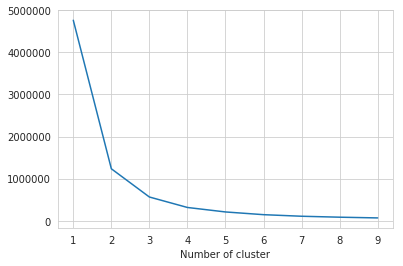

In [1585]:
sse={}
tx_recency = aug_train[["Months Since Policy Inception"]]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [1586]:
aug_train.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log,rev_per_month
0,4950.250892,0,1,3,1,0,27400,1,1,63,14,78,1,9,1,3,2,0,302.400000,1,1,0,8.507396,567
1,8311.854644,0,1,1,1,1,44843,2,2,105,14,34,0,3,1,4,0,1,391.419263,2,1,0,9.025558,315
2,5623.611187,0,1,1,1,0,31504,1,1,71,8,27,0,3,2,6,3,1,340.800000,1,2,0,8.634907,213
3,5461.967787,0,1,0,1,0,42650,0,1,69,10,92,0,5,1,3,2,0,35.565605,1,1,0,8.605747,345
4,9976.245490,0,1,0,1,1,74115,2,1,63,24,24,0,2,1,4,1,1,275.349481,1,1,0,9.208062,126


In [1587]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(aug_train[["Months Since Policy Inception"]])
aug_train['RecencyCluster'] = kmeans.predict(aug_train[["Months Since Policy Inception"]])

In [1588]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(aug_train[["Number of Policies"]])
aug_train['FrequencyCluster'] = kmeans.predict(aug_train[["Number of Policies"]])

In [1589]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(aug_train[["rev_per_month"]])
aug_train['RevenueCluster'] = kmeans.predict(aug_train[["rev_per_month"]])

In [1590]:
aug_train['OverallScore'] = aug_train['RecencyCluster'] + aug_train['FrequencyCluster'] + aug_train['RevenueCluster']
aug_train.groupby('OverallScore')['Months Since Policy Inception','Number of Policies','rev_per_month'].mean()#added new column of overallscore

,Months Since Policy Inception,Number of Policies,rev_per_month
OverallScore,,,
1,60.696864,2.885017,222.797909
2,43.483503,2.947970,264.302030
3,65.949568,2.189481,201.043948
4,36.431650,2.830976,249.812121
5,60.422442,3.212321,324.526953
6,26.019506,3.001300,283.551365
7,27.839506,8.061728,768.469136
8,13.363636,8.431818,1143.681818


In [1591]:
lis=["RecencyCluster","FrequencyCluster","RevenueCluster"]
aug_train=aug_train.drop(lis,axis=1)

In [1592]:
aug_train.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log,rev_per_month,OverallScore
0,4950.250892,0,1,3,1,0,27400,1,1,63,14,78,1,9,1,3,2,0,302.400000,1,1,0,8.507396,567,6
1,8311.854644,0,1,1,1,1,44843,2,2,105,14,34,0,3,1,4,0,1,391.419263,2,1,0,9.025558,315,3
2,5623.611187,0,1,1,1,0,31504,1,1,71,8,27,0,3,2,6,3,1,340.800000,1,2,0,8.634907,213,2
3,5461.967787,0,1,0,1,0,42650,0,1,69,10,92,0,5,1,3,2,0,35.565605,1,1,0,8.605747,345,3
4,9976.245490,0,1,0,1,1,74115,2,1,63,24,24,0,2,1,4,1,1,275.349481,1,1,0,9.208062,126,2


In [1593]:
aug_train.shape

(6119, 25)

In [1594]:
aug_test.shape

(3015, 24)

In [1595]:
scale_list=["Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception"]
for i in scale_list:
    Scaling(aug_train,i)
    Scaling(aug_test,i)#scaling using minmax scaler

/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: Da

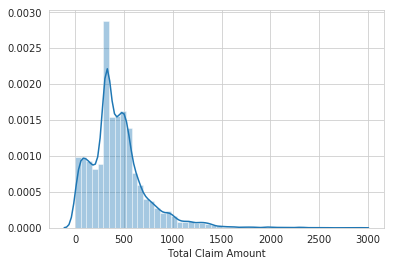

In [1596]:
sns.distplot(aug_train["Total Claim Amount"])

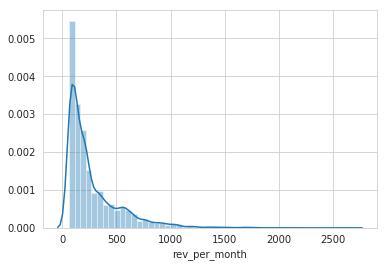

In [1597]:
sns.distplot(aug_train["rev_per_month"])

In [1598]:
log_list=["Total Claim Amount","rev_per_month"]
for i in log_list:
    log_transform(aug_train,i)
    log_transform(aug_test,i)#log transform as these columns are skewed

In [1599]:
remove_list=scale_list+log_list
remove_list.append("Customer Lifetime Value")

In [1600]:
aug_train=aug_train.drop(remove_list,axis=1)
aug_test=aug_test.drop(remove_list,axis=1)

In [1601]:
aug_train.head()
aug_train.shape

(6119, 24)

In [1602]:
aug_test.head()
aug_test.shape

(3015, 23)

# Predicting "OverallScore" from aug_train using XGBclassifier

In [1603]:
from xgboost import XGBClassifier
xgb_class=XGBClassifier()

In [1604]:
aug_train_seg=aug_train["OverallScore"]
aug_train=aug_train.drop(["OverallScore"],axis=1)

In [1605]:
xgb_class.fit(aug_train,aug_train_seg)
aug_test_seg=xgb_class.predict(aug_test)

In [1606]:
aug_test["OverallScore"]=aug_test_seg

In [1607]:
aug_train["OverallScore"]=aug_train_seg

In [1608]:
aug_train.shape

(6119, 24)

In [1609]:
aug_test.shape

(3015, 24)

In [1610]:
aug_test.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_range,Customer Lifetime Value_log,Income_scaled,Monthly Premium Auto_scaled,Months Since Last Claim_scaled,Months Since Policy Inception_scaled,Total Claim Amount_log,rev_per_month_log,OverallScore
0,0,3,3,0,1,1,2,0,1,1,4,1,1,1,1,0,8.245709,0.000000,0.199153,0.200000,0.575758,6.657497,4.691348,3
1,0,1,3,0,0,1,2,0,2,1,3,0,1,1,2,0,9.577056,0.000000,0.029661,0.057143,0.828283,5.791183,4.919981,3
2,0,3,3,1,0,1,1,1,2,0,2,2,1,1,2,0,9.500995,0.887229,0.207627,0.400000,0.727273,6.270988,5.398163,1
3,0,2,1,0,0,1,2,0,1,1,4,2,0,2,1,0,8.438451,0.000000,0.292373,0.314286,0.000000,6.842683,4.875197,6
4,0,1,0,1,0,0,0,0,4,0,2,1,0,1,1,0,8.571530,0.620858,0.025424,0.685714,0.222222,3.920696,5.594711,4


# Drop Number of policies to remove multicollinearity

In [1612]:
aug_train=aug_train.drop(["Number of Policies"],axis=1)
aug_test=aug_test.drop(["Number of Policies"],axis=1)

In [1688]:
def adjusted_r2_score(y_test,y_pred,num):
        n = y_test.shape[0]
        p = num
        r2 = r2_score(y_test,y_pred)
        return 1 - (1-r2**2)*(n-1)/(n-p-1)

In [1689]:
aug_test.shape

(3015, 22)

# overall test using XGBregressor and comparison with other models

In [1703]:
from sklearn.linear_model import LinearRegression

In [1704]:
li=LinearRegression()

In [1706]:
li.fit(aug_train,y_aug_train)
y_li=li.predict(aug_test)

In [1707]:
back_aug_test = np.expm1(y_aug_test)
y_li_back= np.expm1(y_li)

In [1708]:
r2_score(back_aug_test,y_li_back)

0.5582123264330469

In [1709]:
adjusted_r2_score(back_aug_test,y_li_back,22)

0.30653924403901356

In [1710]:
mean_squared_error(back_aug_test,y_li_back)

19711733.621065002

In [1711]:
np.mean(np.abs((back_aug_test - y_li_back) / back_aug_test)) * 100

24.708476189271288

In [1675]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor()

In [1705]:
y_aug_train=aug_train["Customer Lifetime Value_log"]
y_aug_test=aug_test["Customer Lifetime Value_log"]
aug_train=aug_train.drop(["Customer Lifetime Value_log"],axis=1)
aug_test=aug_test.drop(["Customer Lifetime Value_log"],axis=1)

In [1677]:
xgb_reg.fit(aug_train,y_aug_train)
y_pred=xgb_reg.predict(aug_test)

In [1678]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [1679]:
mean_squared_error(y_aug_test,y_pred)

0.016868593930024628

In [1680]:
r2_score(y_aug_test,y_pred)

0.960046780803106

In [1681]:
mean_absolute_error(y_aug_test,y_pred)*100

7.43106515147261

In [1682]:
back_aug_test = np.expm1(y_aug_test)

In [1683]:
y_pred_back= np.expm1(y_pred)

In [1684]:
mean_squared_error(back_aug_test,y_pred_back)

5453852.00528111

In [1685]:
r2_score(back_aug_test,y_pred_back)

0.877765972506003

In [1686]:
np.mean(np.abs((back_aug_test - y_pred_back) / back_aug_test)) * 100

7.137291865185823

In [1690]:
adjusted_r2_score(back_aug_test,y_pred_back,22)

0.768785404713596

In [1691]:
xgb_reg.feature_importances_

array([0.00925926, 0.        , 0.01080247, 0.01697531, 0.01080247,
       0.00154321, 0.02623457, 0.04320988, 0.00154321, 0.00462963,
       0.        , 0.00925926, 0.00308642, 0.00154321, 0.07253087,
       0.10648149, 0.30401236, 0.0154321 , 0.01851852, 0.0154321 ,
       0.3117284 , 0.01697531], dtype=float32)

In [1692]:
aug_train.columns

Index(['Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Number of Open Complaints',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'CLV_range', 'Income_scaled',
       'Monthly Premium Auto_scaled', 'Months Since Last Claim_scaled',
       'Months Since Policy Inception_scaled', 'Total Claim Amount_log',
       'rev_per_month_log', 'OverallScore'],
      dtype='object')

In [1693]:
y_pred_dtr=clasif(aug_train,aug_test,"DTR",y_aug_test,y_aug_train)#decision tree regressor

0.02044128020906785
0.9515848829934561


In [1694]:
back_dtr=np.expm1(y_pred_dtr)

In [1695]:
r2_score(back_aug_test,back_dtr)

0.8138173026272268

In [1664]:
mean_squared_error(back_aug_test,back_dtr)

8844978.004683573

In [1696]:
adjusted_r2_score(back_aug_test,back_dtr,22)

0.6598155035411573

In [1697]:
np.mean(np.abs((back_aug_test - back_dtr) / back_dtr)) * 100

6.1301009542110085

In [1698]:
y_pred_rfr=clasif(aug_train,aug_test,"RFR",y_aug_test,y_aug_train)#random forest regressor

/home/hadesanirban/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.014018809742095226
0.9667964869609814


In [1699]:
back_rfr=np.expm1(y_pred_rfr)

In [1700]:
r2_score(back_aug_test,back_rfr)

0.8910143162439205

In [1669]:
mean_squared_error(back_aug_test,back_rfr)

4990297.4129293375

In [1701]:
adjusted_r2_score(back_aug_test,back_rfr,22)

0.7923911184556771

In [1670]:
np.mean(np.abs((back_aug_test - back_rfr) / back_rfr)) * 100

5.585748090526128

In [1702]:
aug_train["Customer Lifetime Value_log"]=y_aug_train
aug_test["Customer Lifetime Value_log"]=y_aug_test

# trying by removing certain features

In [812]:
aug_train.shape

(6119, 24)

In [813]:
aug_test.shape

(3015, 24)

In [867]:
try_df_train=augment_df(aug_train,["Gender","Policy Type","Sales Channel","Policy","Number of Policies"])
try_df_test=augment_df(aug_test,["Gender","Policy Type","Sales Channel","Policy","Number of Policies"])

In [868]:
y_try_train=try_df_train["Customer Lifetime Value_log"]
y_try_test=try_df_test["Customer Lifetime Value_log"]
try_df_train=try_df_train.drop(["Customer Lifetime Value_log"],axis=1)
try_df_test=try_df_test.drop(["Customer Lifetime Value_log"],axis=1)

In [869]:
xgb_reg.fit(try_df_train,y_try_train)
y_try_pred=xgb_reg.predict(try_df_test)

In [870]:
r2_score(y_try_test,y_try_pred)

0.9589662364119169

In [871]:
back_try_test=np.expm1(y_try_test)

In [872]:
y_try_pred_back=np.expm1(y_try_pred)

In [873]:
r2_score(back_try_test,y_try_pred_back)

0.8766794810756265

In [874]:
try_df_train["Customer Lifetime Value_log"]=y_try_train
try_df_test["Customer Lifetime Value_log"]=y_try_test

In [875]:
aug_train.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_range,Income_scaled,Monthly Premium Auto_scaled,Months Since Last Claim_scaled,Months Since Policy Inception_scaled,Total Claim Amount_log,rev_per_month_log,OverallScore,Customer Lifetime Value_log
0,0,1,3,1,0,1,1,1,9,1,3,2,0,1,1,0,0.274107,0.008439,0.400000,0.787879,5.715052,6.342121,2,8.507396
1,0,1,1,1,1,2,2,0,3,1,4,0,1,2,1,0,0.448605,0.185654,0.400000,0.343434,5.972331,5.755742,4,9.025558
2,0,1,1,1,0,1,1,0,3,2,6,3,1,1,2,0,0.315163,0.042194,0.228571,0.272727,5.834226,5.365976,1,8.634907
3,0,1,0,1,0,0,1,0,5,1,3,2,0,1,1,0,0.426666,0.033755,0.285714,0.929293,3.599108,5.846439,6,8.605747
4,0,1,0,1,1,2,1,0,2,1,4,1,1,1,1,0,0.741439,0.008439,0.685714,0.242424,5.621666,4.844187,1,9.208062


# Kfold

In [1435]:
rfr=RandomForestRegressor()

In [1436]:
from sklearn.model_selection import StratifiedKFold

In [1437]:
cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=False)

In [1438]:
cross_val_score(xgb_reg, pd.concat([aug_train,aug_test],ignore_index=True), pd.concat([y_aug_train,y_aug_test],ignore_index=True), cv=3)

array([0.99979054, 0.99979242, 0.99977657])

# Plots to justify that number of policies == 2 is a good representation of a dataset

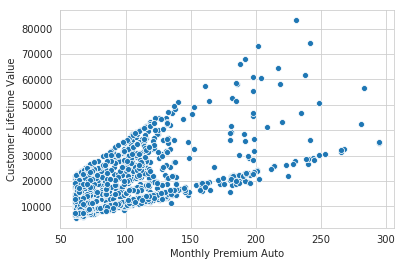

In [1366]:
sns.scatterplot(x=data[data["Number of Policies"] == 2]["Monthly Premium Auto"],
                y=data[data["Number of Policies"] == 2]["Customer Lifetime Value"])

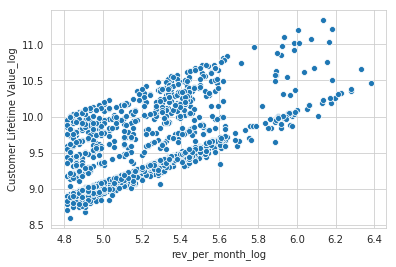

In [1403]:
sns.scatterplot(x=aug_train[aug_train["Number of Policies"] == 2]["rev_per_month_log"],
                y=aug_train[aug_train["Number of Policies"] == 2]["Customer Lifetime Value_log"])

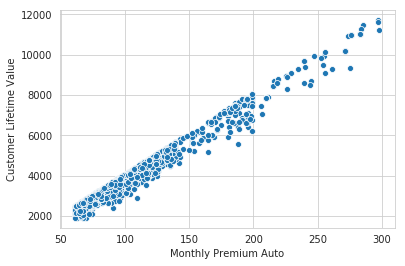

In [1367]:
sns.scatterplot(x=data[data["Number of Policies"] == 1]["Monthly Premium Auto"],
                y=data[data["Number of Policies"] == 1]["Customer Lifetime Value"])

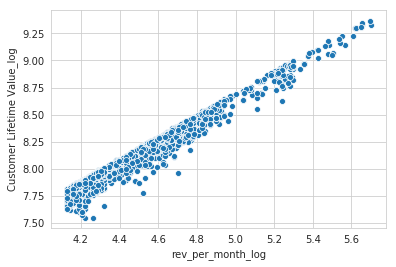

In [1406]:
sns.scatterplot(x=aug_train[aug_train["Number of Policies"] == 1]["rev_per_month_log"],
                y=aug_train[aug_train["Number of Policies"] == 1]["Customer Lifetime Value_log"])

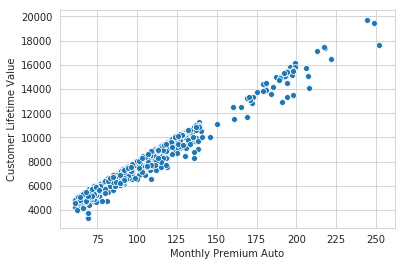

In [1368]:
sns.scatterplot(x=data[data["Number of Policies"] == 3]["Monthly Premium Auto"],
                y=data[data["Number of Policies"] == 3]["Customer Lifetime Value"])

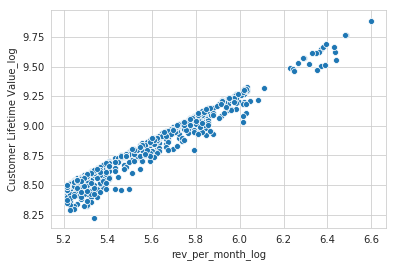

In [1407]:
sns.scatterplot(x=aug_train[aug_train["Number of Policies"] == 3]["rev_per_month_log"],
                y=aug_train[aug_train["Number of Policies"] == 3]["Customer Lifetime Value_log"])

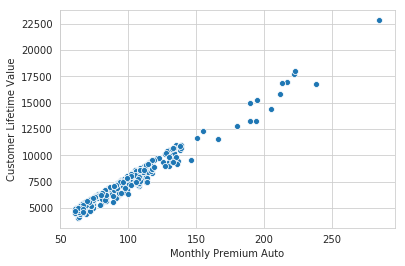

In [1369]:
sns.scatterplot(x=data[data["Number of Policies"] == 4]["Monthly Premium Auto"],
                y=data[data["Number of Policies"] == 4]["Customer Lifetime Value"])

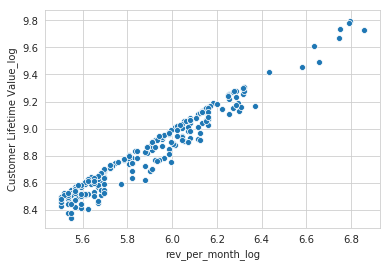

In [1408]:
sns.scatterplot(x=aug_train[aug_train["Number of Policies"] == 4]["rev_per_month_log"],
                y=aug_train[aug_train["Number of Policies"] == 4]["Customer Lifetime Value_log"])

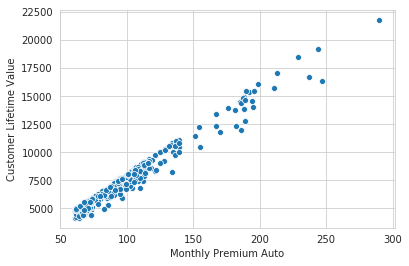

In [1370]:
sns.scatterplot(x=data[data["Number of Policies"] == 5]["Monthly Premium Auto"],
                y=data[data["Number of Policies"] == 5]["Customer Lifetime Value"])

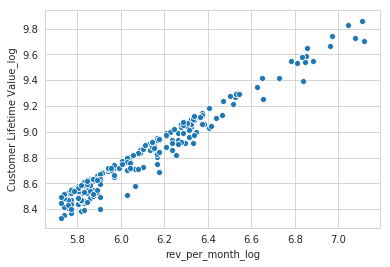

In [1409]:
sns.scatterplot(x=aug_train[aug_train["Number of Policies"] == 5]["rev_per_month_log"],
                y=aug_train[aug_train["Number of Policies"] == 5]["Customer Lifetime Value_log"])

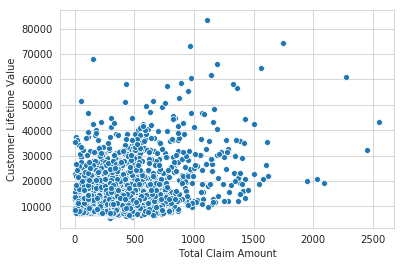

In [1371]:
sns.scatterplot(x=data[data["Number of Policies"] == 2]["Total Claim Amount"],
                y=data[data["Number of Policies"] == 2]["Customer Lifetime Value"])

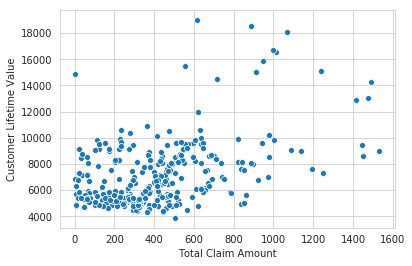

In [1372]:
sns.scatterplot(x=data[data["Number of Policies"] == 6]["Total Claim Amount"],
                y=data[data["Number of Policies"] == 6]["Customer Lifetime Value"])

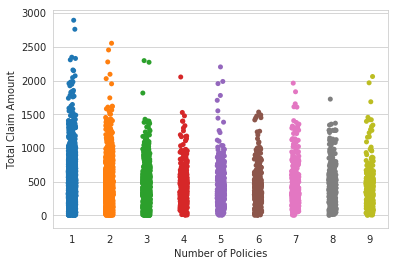

In [1373]:
sns.stripplot(x="Number of Policies",y="Total Claim Amount",data=data)

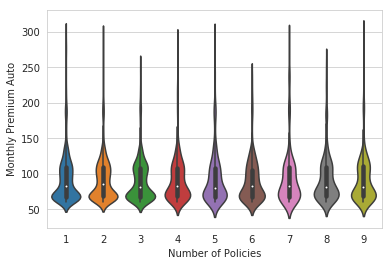

In [1374]:
sns.violinplot(x="Number of Policies",y="Monthly Premium Auto",data=data)

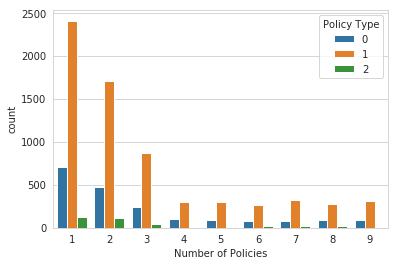

In [1375]:
sns.countplot(data["Number of Policies"],hue=data["Policy Type"])

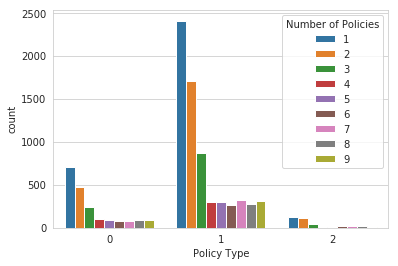

In [1376]:
sns.countplot(data["Policy Type"],hue=data["Number of Policies"])

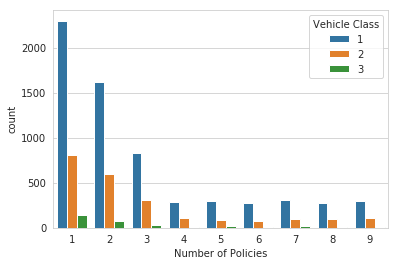

In [1377]:
sns.countplot(data["Number of Policies"],hue=data["Vehicle Class"])

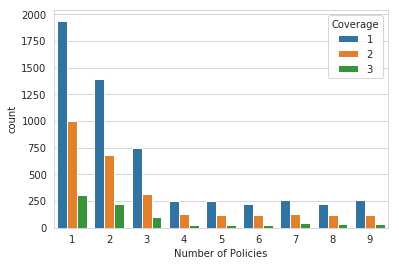

In [1378]:
sns.countplot(data["Number of Policies"],hue=data["Coverage"])

In [1379]:
data["Number of Policies"].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

# Ensemble

In [905]:
aug_test.shape

(3015, 24)

In [899]:
aug_train.shape

(6119, 24)

In [910]:
df_not_2_train=aug_train[aug_train["Number of Policies"] != 2]
df_not_2_test=aug_test[aug_test["Number of Policies"] != 2]

In [911]:
y_df_not_2_train=df_not_2_train["Customer Lifetime Value_log"]
y_df_not_2_test=df_not_2_test["Customer Lifetime Value_log"]
df_not_2_train=df_not_2_train.drop(['Customer Lifetime Value_log'],axis=1)
df_not_2_test=df_not_2_test.drop(["Customer Lifetime Value_log"],axis=1)

In [921]:
xgb_reg=XGBRegressor()

In [913]:
xgb_reg.fit(df_not_2_train,y_df_not_2_train)
y_pred=xgb_reg.predict(df_not_2_test)

In [915]:
df_not_2_test.index

Int64Index([   0,    3,    4,    7,    9,   10,   14,   15,   16,   17,
            ...
            3001, 3002, 3003, 3004, 3006, 3008, 3011, 3012, 3013, 3014],
           dtype='int64', length=2263)

In [917]:
y_pred=pd.DataFrame(y_pred,index=df_not_2_test.index)

In [919]:
df_2_train=aug_train[aug_train["Number of Policies"] == 2]
df_2_test=aug_test[aug_test["Number of Policies"] == 2]

In [920]:
y_df_2_train=df_2_train["Customer Lifetime Value_log"]
y_df_2_test=df_2_test["Customer Lifetime Value_log"]
df_2_train=df_2_train.drop(['Customer Lifetime Value_log'],axis=1)
df_2_test=df_2_test.drop(["Customer Lifetime Value_log"],axis=1)

In [922]:
xgb_reg.fit(df_2_train,y_df_2_train)
y_pred_2=xgb_reg.predict(df_2_test)

In [924]:
y_pred_2=pd.DataFrame(y_pred_2,index=df_2_test.index)

In [930]:
merge=pd.concat([y_pred,y_pred_2],ignore_index=False)

In [933]:
merge_sorted=merge.sort_index()

In [935]:
r2_score(merge_sorted,y_aug_test)

0.9685276188227446

In [936]:
merge_back=np.expm1(merge_sorted)
aug_back=np.expm1(y_aug_test)

In [937]:
r2_score(merge_back,aug_back)

0.8721249477362313

# Stacking

In [941]:
from mlxtend.regressor import StackingRegressor

In [940]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 284kB/s eta 0:00:01
     |████████████████████████████████| 6.7MB 582kB/s eta 0:00:01
     |████████████████████████████████| 13.1MB 983kB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.2
    Uninstalling scikit-learn-0.20.2:
      Successfully uninstalled scikit-learn-0.20.2
  Found existing installation: matplotlib 2.2.3
    Uninstalling matplotlib-2.2.3:
      Successfully uninstalled matplotlib-2.2.3


In [947]:
lr = LinearRegression(
    n_jobs = -1
)

xgb = XGBRegressor()
    
rd = Ridge(
    alpha = 4.84
)

rf = RandomForestRegressor(
    n_estimators = 12,
    max_depth = 3,
    n_jobs = -1
)

gb = GradientBoostingRegressor(
    n_estimators = 40,
    max_depth = 2
)

model = StackingRegressor(
    regressors=[rf, gb,rd, xgb],
    meta_regressor=lr
)

In [945]:
from sklearn.linear_model import LinearRegression,Ridge

In [951]:
model.fit(aug_train,y_aug_train)
y_pred_stack=model.predict(aug_test)

In [952]:
r2_score(y_aug_test,y_pred_stack)

0.9691516125167302

In [953]:
back_stack=np.expm1(y_pred_stack)

In [955]:
r2_score(aug_back,back_stack)

0.8914763140837996

# Statistical tests

In [1380]:
#shapiro-wilk test for normality

In [1381]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data["Customer Lifetime Value"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.703, p=0.000
Sample does not look Gaussian (reject H0)


/home/hadesanirban/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  


In [1382]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data["Customer Lifetime Value_log"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)


/home/hadesanirban/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  


In [1383]:
#D’Agostino’s K^2 Test for normality

In [1384]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# normality test
stat, p = normaltest(data["Customer Lifetime Value"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=6056.611, p=0.000
Sample does not look Gaussian (reject H0)


In [1385]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# normality test
stat, p = normaltest(data["Customer Lifetime Value_log"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=441.708, p=0.000
Sample does not look Gaussian (reject H0)


In [1442]:
#testing multicollinearity

In [1400]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [1401]:
calculate_vif_(aug_train.drop(["Customer Lifetime Value_log"],axis=1))

dropping 'rev_per_month_log' at index: 21
dropping 'Total Claim Amount_log' at index: 20
dropping 'Policy' at index: 10
dropping 'Vehicle Class' at index: 12
dropping 'Coverage' at index: 1
Remaining variables:
Index(['Response', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Number of Open Complaints', 'Number of Policies',
       'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size',
       'CLV_range', 'Income_scaled', 'Monthly Premium Auto_scaled',
       'Months Since Last Claim_scaled',
       'Months Since Policy Inception_scaled', 'OverallScore'],
      dtype='object')


,Response,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Vehicle Size,CLV_range,Income_scaled,Monthly Premium Auto_scaled,Months Since Last Claim_scaled,Months Since Policy Inception_scaled,OverallScore
0,0,3,1,0,1,1,1,9,1,2,0,1,0,0.274107,0.008439,0.400000,0.787879,4
1,0,1,1,1,2,2,0,3,1,0,1,1,0,0.448605,0.185654,0.400000,0.343434,6
2,0,1,1,0,1,1,0,3,2,3,1,2,0,0.315163,0.042194,0.228571,0.272727,3
3,0,0,1,0,0,1,0,5,1,2,0,1,0,0.426666,0.033755,0.285714,0.929293,8
4,0,0,1,1,2,1,0,2,1,1,1,1,0,0.741439,0.008439,0.685714,0.242424,1
5,0,1,1,1,1,1,1,5,1,1,2,2,0,0.249287,0.097046,0.600000,0.020202,7
6,0,3,1,0,1,1,0,1,1,1,1,2,0,0.356679,0.046414,0.485714,0.191919,3
7,0,1,0,1,1,2,0,2,1,0,0,2,1,0.000000,0.029536,0.171429,0.949495,2
8,0,3,1,1,2,0,0,6,0,1,1,2,0,0.775422,0.181435,0.057143,0.050505,5
9,0,0,0,0,1,2,0,1,0,0,2,1,0,0.000000,0.029536,0.285714,0.818182,4


In [1399]:
aug_train.corr()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_range,Income_scaled,Monthly Premium Auto_scaled,Months Since Last Claim_scaled,Months Since Policy Inception_scaled,Total Claim Amount_log,rev_per_month_log,OverallScore,Customer Lifetime Value_log
Response,1.000000,0.002856,0.009548,0.173914,0.009228,0.007292,-0.092909,-0.004998,-0.017310,0.014891,0.012142,-0.160720,-0.096010,0.021573,-0.065489,-0.016781,0.019948,0.013991,-0.016193,0.022141,0.054887,-0.020446,-0.040143,-0.002145
Coverage,0.002856,1.000000,0.036574,-0.015302,-0.009736,-0.025288,0.012575,-0.004531,-0.030111,-0.004784,-0.005738,-0.050817,-0.030359,0.008113,-0.008657,0.070413,-0.006045,0.456469,0.035069,0.008052,0.174749,0.165119,0.079185,0.226363
Education,0.009548,0.036574,1.000000,0.020816,0.004660,-0.012800,-0.003451,-0.021009,-0.003076,0.020866,0.020285,0.056757,-0.005962,0.012464,-0.008485,0.038736,0.028667,0.027178,0.009366,0.010280,0.004848,0.007995,-0.005712,0.037981
EmploymentStatus,0.173914,-0.015302,0.020816,1.000000,-0.016466,0.003668,-0.307596,-0.005714,-0.028636,0.014654,0.011240,0.015326,-0.001186,-0.023052,0.000400,-0.000520,0.404439,-0.023655,0.000350,-0.017260,-0.154827,-0.035910,-0.043497,0.022358
Gender,0.009228,-0.009736,0.004660,-0.016466,1.000000,-0.004688,0.038260,-0.005343,0.026443,0.001596,-0.000095,0.043617,-0.014306,0.031173,0.005704,-0.027567,-0.013759,0.018929,0.028877,-0.001498,0.081925,0.032337,0.011081,-0.003869
Location Code,0.007292,-0.025288,-0.012800,0.003668,-0.004688,1.000000,0.018532,-0.003698,0.014353,0.009834,0.000082,-0.017244,-0.008131,0.011614,0.025324,0.013564,-0.016474,-0.003153,-0.017633,0.010356,0.486331,0.015937,-0.010465,0.015141
Marital Status,-0.092909,0.012575,-0.003451,-0.307596,0.038260,0.018532,1.000000,0.000397,0.025987,0.008778,0.001881,-0.026597,-0.022258,0.011607,0.024762,-0.008386,-0.231304,0.013890,0.008261,-0.031291,0.154741,0.027568,0.028998,-0.032217
Number of Open Complaints,-0.004998,-0.004531,-0.021009,-0.005714,-0.005343,-0.003698,0.000397,1.000000,0.003514,0.017249,0.025617,-0.036619,-0.002888,-0.015527,0.000468,-0.024846,0.009196,-0.011670,0.003764,-0.003556,-0.007287,-0.003068,-0.004132,-0.045354
Number of Policies,-0.017310,-0.030111,-0.003076,-0.028636,0.026443,0.014353,0.025987,0.003514,1.000000,-0.001197,0.000182,-0.085091,0.012915,-0.015851,0.029129,-0.096301,-0.010526,-0.023696,0.008628,-0.015831,0.006442,0.880364,0.284609,0.188256
Policy Type,0.014891,-0.004784,0.020866,0.014654,0.001596,0.009834,0.008778,0.017249,-0.001197,1.000000,0.880888,0.001230,-0.001260,0.001211,0.014357,0.011774,-0.003661,-0.002008,-0.019146,-0.001109,0.018721,0.004298,-0.018986,0.025004


In [1454]:
#test for autocorrelation

In [1448]:
def autocorr(x, t=1): 
    return np.corrcoef(np.array([x[:-t], x[t:]]))

In [1453]:
for i in aug_train.columns:
    print(i,autocorr(aug_train[i]))

Response [[ 1.         -0.02266411]
 [-0.02266411  1.        ]]
Coverage [[ 1.         -0.00519356]
 [-0.00519356  1.        ]]
Education [[1.         0.00735438]
 [0.00735438 1.        ]]
EmploymentStatus [[1.         0.01158017]
 [0.01158017 1.        ]]
Gender [[ 1.         -0.00948896]
 [-0.00948896  1.        ]]
Location Code [[ 1.         -0.00511707]
 [-0.00511707  1.        ]]
Marital Status [[ 1.         -0.00594085]
 [-0.00594085  1.        ]]
Number of Open Complaints [[ 1.         -0.02005449]
 [-0.02005449  1.        ]]
Policy Type [[1.         0.00176423]
 [0.00176423 1.        ]]
Policy [[1.         0.00758271]
 [0.00758271 1.        ]]
Renew Offer Type [[ 1.         -0.02529119]
 [-0.02529119  1.        ]]
Sales Channel [[1.         0.00307841]
 [0.00307841 1.        ]]
Vehicle Class [[ 1.         -0.01846153]
 [-0.01846153  1.        ]]
Vehicle Size [[ 1.         -0.00664114]
 [-0.00664114  1.        ]]
CLV_range [[1.         0.00728644]
 [0.00728644 1.        ]]
Incom

In [1455]:
from scipy.stats import levene

In [1462]:
w,p=levene(data["Customer Lifetime Value"],data["Total Claim Amount"])

In [1713]:
data=data.drop(["Customer Lifetime Value","Customer Lifetime Value_log"],axis=1)